Benemérita Universidad Autónoma de Puebla
![image](https://drive.google.com/uc?export=view&id=1Ugk24FB0FcMahW9jSEdIRPSZUoOUYnGy)



**<font color=#3333ff>Facultad de Ciencias Físco Matemáticas</font>**

![image 2](https://drive.google.com/uc?export=view&id=1C25kNo7qgW2tlW1SOqpmlyfnaZAG5IvJ)

> Posgrado en Ciencias (Física Aplicada)

Métodos Matemáticos

Prof. Dr. Javier M. Hernández Lopez

T10, P4
Resolución de la ecuación deiferencial para $n = 4$

Estudiante: 

*   Angel Ricardo Sánchez Zeferino


**Desarrollo**

La ecuación diferencial de Legendre para $n = 4$ toma la forma

$
(1-x^2) y'' -2xy' + (4)(4+1)y = 0
$

Haciendo el cambio de variable 

$x_{1}=y$

$x_{2}=y'$

$x = t$

Se obtiene el sistema 

$\dfrac{dx_{1}}{dt} = y'$

$\dfrac{dx_{2}}{dt} = y'' = \dfrac{2xy' - (4)(4+1)y}{(1-x^2)} =  \dfrac{2tx_{2} - 20x_{1}}{(1-t^2)}  $

Es decir 


$\dfrac{dx_{1}}{dt} =x_{2}$

$\dfrac{dx_{2}}{dt} =  \dfrac{2tx_{2} - 20x_{1}}{(1-t^2)}  $

Bajo la condición de que 


$x_{1} (t = 0) = 3/8
$

y 

$x_{2} (t = 0) = 0$

Finalmente se aplica el método de Runge-Kutta a cada ecuación diferencial.

In [1]:
## Librerias empleadas
import math as mt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = .001
x1 = 3/8
x2 = 0
n  = 1000

In [3]:
# creamos las funciones 

def f_1(x1,x2,t): # y
    dx1dt = x2
    return dx1dt

def f_2(x1,x2,t): # y'
    dx2dt = ((2*t*x2)-(20*x1))/(1-(t**2))
    return dx2dt    

In [4]:
res =[]*n
for i in np.arange(0,n):
    f11 = k*f_1(x1,x2,i*k)
    f21 = k*f_2(x1,x2,i*k)

    f12 = k*f_1(x1+.5*f11,x2+.5*f21,i*k+.5*k)
    f22 = k*f_2(x1+.5*f11,x2+.5*f21,i*k+.5*k)

    f13 = k*f_1(x1+.5*f12,x2+.5*f22,i*k+.5*k)
    f23 = k*f_2(x1+.5*f12,x2+.5*f22,i*k+.5*k)

    f14 = k*f_1(x1+f13,x2+f23,i*k+k)
    f24 = k*f_2(x1+f13,x2+f23,i*k+k)

    x1 += (f11+2*f12+2*f13+f14)/6
    x2 += (f21+2*f22+2*f23+f24)/6
    
    res.append(x1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [5]:
## Creamos la x1 analítica
x1r = []*n    
for i in np.arange(0,n):
    x1a = (1/8)*((35*(i*k)**4)-(30*(i*k)**2)+3)
    x1r.append(x1a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


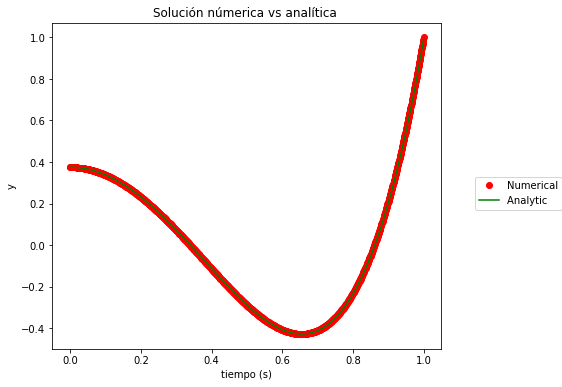

In [10]:

tiempo = np.arange(0,n*k,k)
# Visualización
fig, ax = plt.subplots(1, figsize=(8, 6))
line_labels = ["Numerical", "Analytic "]
l1=ax.plot(tiempo, res, 'ro')[0]
l2=ax.plot(tiempo, x1r, color="green")[0]


fig.legend([l1, l2],          
           labels= line_labels,       
           loc="center right",        
           borderaxespad=0.1)      
plt.subplots_adjust(right=0.8)
plt.xlabel("tiempo (s)")
plt.ylabel("y")
plt.title("Solución númerica vs analítica ")
# Show the plot
plt.show()